In [8]:
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [7]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


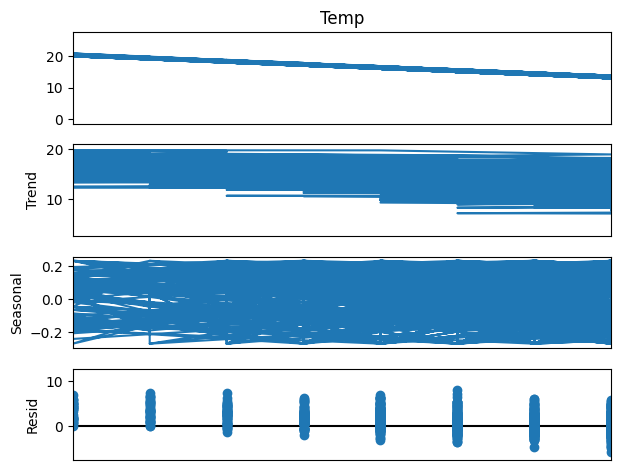

Epoch 1/50
92/92 - 1s - loss: 130.6865 - 635ms/epoch - 7ms/step
Epoch 2/50
92/92 - 0s - loss: 103.2483 - 162ms/epoch - 2ms/step
Epoch 3/50
92/92 - 0s - loss: 65.8497 - 165ms/epoch - 2ms/step
Epoch 4/50
92/92 - 0s - loss: 32.4496 - 129ms/epoch - 1ms/step
Epoch 5/50
92/92 - 0s - loss: 14.0706 - 111ms/epoch - 1ms/step
Epoch 6/50
92/92 - 0s - loss: 8.1745 - 123ms/epoch - 1ms/step
Epoch 7/50
92/92 - 0s - loss: 6.9851 - 112ms/epoch - 1ms/step
Epoch 8/50
92/92 - 0s - loss: 6.6515 - 107ms/epoch - 1ms/step
Epoch 9/50
92/92 - 0s - loss: 6.3760 - 112ms/epoch - 1ms/step
Epoch 10/50
92/92 - 0s - loss: 6.0828 - 112ms/epoch - 1ms/step
Epoch 11/50
92/92 - 0s - loss: 5.7633 - 107ms/epoch - 1ms/step
Epoch 12/50
92/92 - 0s - loss: 5.4256 - 109ms/epoch - 1ms/step
Epoch 13/50
92/92 - 0s - loss: 5.0656 - 119ms/epoch - 1ms/step
Epoch 14/50
92/92 - 0s - loss: 4.6891 - 111ms/epoch - 1ms/step
Epoch 15/50
92/92 - 0s - loss: 4.3020 - 108ms/epoch - 1ms/step
Epoch 16/50
92/92 - 0s - loss: 3.9049 - 107ms/epoch - 1ms

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


df = pd.read_csv(r'minimum_temperature.csv')

# Extract features and labels
X = df['Temp'].values.reshape(-1, 1) 
y = df['Temp'].values   

# Check and visualize seasonality
date_index = pd.to_datetime(df['Temp'])
df.set_index(date_index, inplace=True)

result = seasonal_decompose(df['Temp'], model='additive', period=11)  # Adjust the period as needed
result.plot()
plt.show()

# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Reshape X_train to make it 3D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build a simple CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1), padding='same'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Evaluate the model on the test set
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
loss = model.evaluate(X_test_reshaped, y_test, verbose=0)

print(f'Mean Squared Error on Test Set: {loss}')
